<a href="https://colab.research.google.com/github/dev-aprilchoi/projectManager/blob/main/d03_%EA%B8%B0%EC%88%A0%ED%86%B5%EA%B3%84(0913).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 복습

먼저 car.xlsx 파일을 열어봅시다

In [2]:
import pandas as pd
df = pd.read_excel('car.xlsx')
df.head()

,mileage,model,price,year,my_car_damage,other_car_damage
0,63608,K3,970,2017,0,564596
1,69336,K3,1130,2015,1839700,1140150
2,36000,K3,1380,2016,446520,2244910
3,19029,K3,1390,2017,889000,4196110
4,97090,K3,760,2015,2339137,2029570


# mileage의 기술 통계



*   평균
*   중간값
*   표준편차



In [4]:
df.mileage.mean() # 평균

77483.22262773722

In [9]:
df['mileage'].median() # 중간값

71649.0

In [6]:
df.mileage.std() # 표준편차

43015.79445317075

### boxplot 그래프로 그려보기

<Axes: xlabel='mileage'>

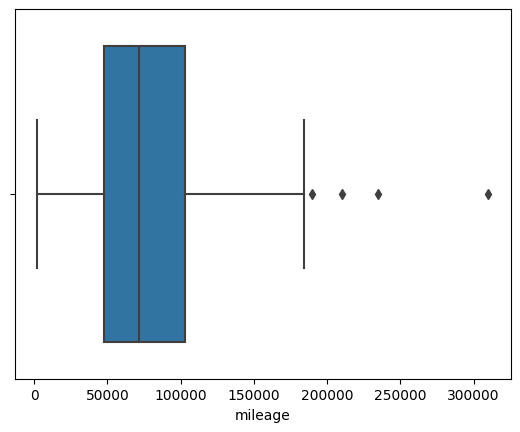

In [7]:
import seaborn as sns
sns.boxplot(x='mileage', data=df)

### 전체정보 다 보고싶을때

In [8]:
df.mileage.describe()

count       274.000000
mean      77483.222628
std       43015.794453
min        2287.000000
25%       47597.500000
50%       71649.000000
75%      103193.750000
max      310000.000000
Name: mileage, dtype: float64

mileage 의 95% 신뢰구간

In [10]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=b4b2241264cd5bead7adc667401dea9562960fa59ed10e1d8cf45777fc67b53e
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [11]:
import pingouin as pg
pg.ttest(df.mileage, 0, confidence=0.95) # 중고차 평균 가격의 95% 신뢰구간

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,29.816386,273,two-sided,7.513310e-88,"[72367.22, 82599.22]",1.801274,1.384e+84,1.0


In [ ]:
# 모집단에서 전수조사를 한다면 평균은 아마도 72367~82599 정도로 나올거다
# 구간을 좁히려면(오차범위를 줄이려면) 데이터를 더 많이 모으면 됨

Q. 95% 신뢰구간이 95% 확률로 이 구간 내에 평균이 있다라고 생각해도 될까요? (어떤 95%냐가 관건)</br>
'확률이라는~ 경우들 중에~'

- 중고자 시장에 진출하려는 회사들이 100개가 있음
- 회사들이 각자 시장조사를 함
- 회사마다 신뢰구간이 다르게 나옴
- 진짜 평균은 단 하나! (그런데 우리는 모름)
- 그 신뢰구간들 중에 95%는 진짜 평균을 포함

"한화가 올해 우승할 확률" => 일상적인 의미의 확률( = 믿음의 강도 = 주관적확률)
동전에서 앞면이 나올 확률 = 동전을 아주 많이 던졌을 때 앞면이 몇 번 나오냐..( = 객관적확률)

# p-value
(1) 계산도 한 번만 하면되고</br>
(2) 계산하기 위한 이론도 더 쉽다

신뢰구간의 문제점</br>
(1) 계산을 최소한 두 번은 해야한다(손으로 하려면 짜증남)</br>
(2) 계산에 어려운 이론이 필요하다(이론이 없으면 시뮬레이션을 아주 많이 해야함)

In [14]:
import pingouin as pg
pg.ttest(df.price, 850, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.182174,273,two-sided,0.855581,"[814.1, 893.22]",0.011006,0.069,0.053784


In [13]:
0.008028 < 0.05 # 800만원의 경우에는 p < 유의수준 이므로 신뢰구간에 포함 X

True

In [15]:
0.855581 < 0.05 # 850만원의 경우에는 p > 우의수준 이므로 신뢰구간에 포함 O

False

## A/B 테스팅
과학 분야에서 무작위 대조군 실험(Randomized Controlled Trials)
- 환자들을 무작위로 나눠서 가짜약(플라시보) 신약을 투여하는
- 고객들에게 서로 다른 웹 페이지나 광고를 보여주고 목표 지표 (예: 전환율을 측정)


## 독립표본 t-검정
두 집단의 평균 차이를 비교하기 위한 검정

In [21]:
avante = df.price[df.model == 'Avante'] # 모델이 Avante인 차량의 가격
K3 = df.price[df.model == 'K3'] # 모델이 k3인 차량의 가격

In [18]:
avante.mean()

833.4146341463414

In [22]:
K3.mean()

913.8115942028985

In [23]:
pg.ttest(avante, K3, confidence=0.95) # 두 집단의 평균을 비교

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.21101,196.691919,two-sided,0.028187,"[-152.11, -8.69]",0.242614,1.482,0.4119


Avante 평균 - K3 평균이 표본에서 -80만원인데
모집단에서는 95% 신뢰구간이 -152 ~ -8 차이든 어쨌든 모집단에서 Avante의 평균이 K3의 평균보다 낮다는 결론

---

귀무가설(기각할 가설): 둘이 똑같다(평균 차이 = 0)

0.028187 < 0.05

귀무가설 기각 -> 둘은 평균이 다르다

"통계적으로 유의한 차이" (Avante와 K3의 차이를 확인할 수 있을만큼 데이터가 충분하다)

In [24]:
pg.ttest(avante, K3, confidence=0.99) # 얼마나 틀려도 졸은지를 생각해보고 결정

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,-2.21101,196.691919,two-sided,0.028187,"[-174.9767711674258, 14.182851054311639]",0.242614,1.482,0.4119


Q. 0.028187 < 0.05 여기서 0.05를 비교하는 이유가 신뢰구간이 95%라고 설정해두었기 때문인거죠?
-> 그럴죠! confidence=0.99로 올리면 결론이 안나는게 문제...그럴때는 어떻게 하나? *데이터를 더 모으면 된다!*

0.028187 < 0.01 이 되니까 귀무가설 기각이 안된다
귀무가설 기각이 안되면 -> 둘의 평균이 같다(X) -> 이럴 수도(Avante가 더 비쌀 수도) 있고, 저럴 수도(K3가 더 비쌀 수도) 있다.

*신뢰수준(또는 유의수준)은 여러분이 감당할 수 있는 수준에서 결정하면 됨*

## 결론이 나오는 형태:
1) 이럴 수도 저럴 수도, 2)차이가 난다
통계적 오류의 두 종류:
False Alarm: 아무 일도 없는데 있는 것처럼
신뢰수준을 높이면 False Alarm이 줄어듦
Miss: 뭔가 있는데 놓치는 것
신뢰수준을 높이면 Miss는 늘어남
사안에 따라서 얼마나 조심할지(신뢰수준) 달라진다

사업을 외부 투자
ex) Netflix 창업: 비디오 테이프 우편 빌려주는 서비스
<절대 성공하지 못할 거야>

Q. 신뢰수준을 무조건 높이면 좋은 건가? (달리 말하면 조심을 하는 것)
-> 보통은 과학연구를 할때 95% 정도로 본다

좀 틀려도 괜찮다 95%(즉 5% 정도는 틀려도 됨)- 아 이건 좀 틀리면 곤란한데.. 99%(즉 1%정도만 틀리겠다)

## 상관 분석
두 변수의 관계

In [25]:
df

,mileage,model,price,year,my_car_damage,other_car_damage
0,63608,K3,970,2017,0,564596
1,69336,K3,1130,2015,1839700,1140150
2,36000,K3,1380,2016,446520,2244910
3,19029,K3,1390,2017,889000,4196110
4,97090,K3,760,2015,2339137,2029570
...,...,...,...,...,...,...
269,235000,Avante,390,2007,1473730,507260
270,140000,Avante,430,2009,14399366,4592589
271,96757,Avante,390,2006,303080,0
272,113853,Avante,390,2008,320780,1857718


# 상관 계수
- 두 변수의 연관성을 -1 ~ +1범위의 수치로 나타낸 것
- 두 변수의 연관성을 파악하기 위해 사용

## 포트폴리오 수익률의 표준편차(위험)
= 구성 자산의 표준편차(위험) +
구성 자산간의 상관관계

코인 <-> 반대로 움직이는 자산

(1) 장기적으로는 결국에는 다 오름..
다만 단기적으로 오르고 내릴 뿐
(2) 장기적으로도 안 오르는데
오른걸 팔아서 수익을 실현하면 됨

## 국민연금 수익률 1년 10%
수익률이 높은 이유?
-> 포트폴리오 구성을 잘한다

경력(시간 투자)
본업 + 부업(취미)

분산투자의 단점: 삼성전자 SK하이닉스

### python 상관 분석

In [26]:
pg.corr(df.price, df.mileage)

,n,r,CI95%,p-val,BF10,power
pearson,274,-0.67616,"[-0.74, -0.61]",5.809388e-38,5.069e+34,1.0


In [27]:
5.809388e-38 < 0.05

True

- r(표본상관계수): -0.67616
    - 부호가 - => 서로 반대로 움직인다
    - 많이 돌아다닌 차는 가격이 떨어진다
- 모집단에서는 어떨까?
    - 95% 신뢰구간: -0.74 ~ -0.61
- 귀무가설: 모집단 상관계수 = 0(관련이 없다)
    - 5.809388e-38 < 0.05 # True
    - 귀무가설 기각 => 관련이 있다

### python 상관 행렬
연속형 변수만 골라서 상관계수를 구함

In [28]:
df.corr(numeric_only=True)

,mileage,price,year,my_car_damage,other_car_damage
mileage,1.000000,-0.676160,-0.569850,0.192549,0.007950
price,-0.676160,1.000000,0.828908,-0.418789,-0.245997
year,-0.569850,0.828908,1.000000,-0.318469,-0.204411
my_car_damage,0.192549,-0.418789,-0.318469,1.000000,0.243626
other_car_damage,0.007950,-0.245997,-0.204411,0.243626,1.000000


**+1 -1이든 1에 가까우면 관련이 강함
0에 가까우면 관련이 약함**

사람에 관련된 것

학교성적 소득 (실제로 0.3)
별로 상관관계가 강하지 않다. 사회에 나가보면 돈 버는 머리가 따로있기때문.. 0.4 ~ 0.5만 되도 사람에 관련된거면 센편 인거다.
일란성 쌍둥이 키가 상관계수 0.99


### 산점도

<Axes: xlabel='mileage', ylabel='price'>

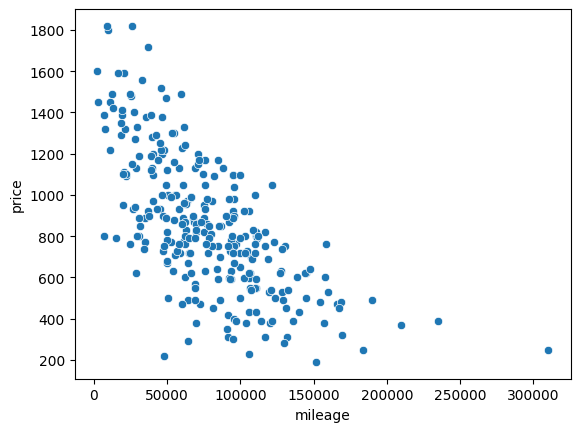

In [30]:
import seaborn as sns
sns.scatterplot(x='mileage', y='price', data=df)

## 통계책 추천
1) The Signal 신호와 소음
2) Noise 노이즈: 생각의 잡음
3) 데이터는 어떻게 인생의 무기가 되는가(가장 재밌을것 같음)

### 통계에서 예측의 의미
- 통계에서 예측(prediction)은 어떤 값에 대한 추론을 의미
- ex) 주택가격: 3억
적정 전세금 = 교통 + 평형 + 건축시점 + 주차장 + 비탈길..? + ...
그럼 집주인이랑 싸울 필요가 없을텐데ㅋㅋ

### 회귀분석 regression
- 독립변수를 이용하여 연속인 종속변수를 예측하는 분석
- 통계의 꽃


### 선형 모형
국어 + 2x영어 + 수학

### 잔차
- 실제값과 예측값의 차이
- 잔차분산: 잔차를 제곱하여 평균낸 것
- cf.분산: 편차(실제값과 평균의 차이) 제곱의 평균
- 잔차분산은 작아야 좋다

### python 회귀분석

In [31]:
from statsmodels.formula.api import ols # 최소제곱법(Ordinary Least Squares)의 약자
m = ols('price ~ mileage', data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     229.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           5.81e-38
Time:                        04:10:51   Log-Likelihood:                -1895.7
No. Observations:                 274   AIC:                             3795.
Df Residuals:                     272   BIC:                             3803.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1258.7668     30.599     41.137      0.000    1198.526    1319.008
mileage       -0.0052      0.000    -15.136      0.000      -0.006      -0.005
==============================================================================
Omnibus:                        0.258   Durbin-Watson:                   1.101
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.108
Skew:                           0.032   Prob(JB):                        0.947
Kurtosis:                       3.074   Cond. No.                     1.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

회귀분석에서 계수의 p-value
귀무가설: 모집단에서 기울기 = 0
주행거리가 많든 적든 가격과는 무관
p < 0.05: 귀무가설 기각 => 주행거리는 가격과 유관

<Axes: xlabel='mileage', ylabel='price'>

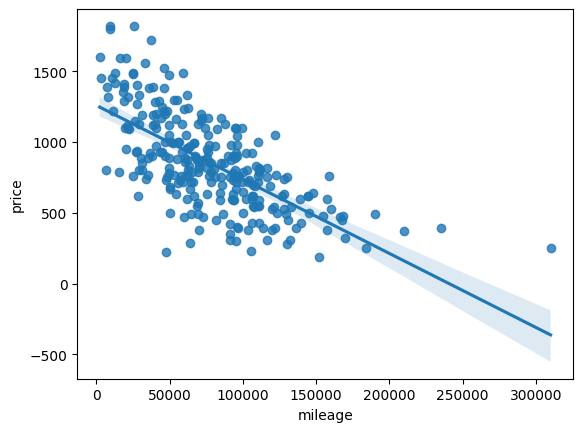

In [32]:
sns.regplot(x='mileage', y='price', data=df)